# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [52]:
import pickle
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import misc
from sklearn.utils import shuffle


#Note: I am using pre-processed data, generated using the code in notebook 'preprocess'

training_file = "d:/archi/ernesto/cursos/self-driving car/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/train_preproc.p"
validation_file= "d:/archi/ernesto/cursos/self-driving car/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/valid_preproc.p"
testing_file = "d:/archi/ernesto/cursos/self-driving car/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/test_preproc.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

#load codification for labels in a python dictionary keyed by the code
import csv
signnames_file = "./signnames.csv"
labels = {}
with open(signnames_file, mode='r') as f:
    rows = csv.reader(f, delimiter=',')
    for code,desc in rows:
        if code == 'ClassId':
            continue
        labels[int(code)] = desc
        

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [53]:
# Number of training examples
n_train = X_train.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 104397
Number of testing examples = 12630
Image data shape = (32, 32, 1)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

**NOTE:** Created another notebook with a more elaborated visualization of the training data: image_visualization

38 Keep right


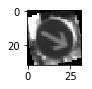

In [54]:
# Visualizations will be shown in the notebook.
%matplotlib inline

def display_image(img, label):
    # visualize an image and its label
    if len(img.shape) > 2:
        img = img.squeeze()
    plt.figure(figsize=(1, 1))
    plt.imshow(img, cmap='gray')
    #plt.show()
    print(label,labels[label])

def display_image_vector(v, label):
    rows = 1
    cols = len(v)
    fig = plt.figure(figsize=(cols, rows))
    print(label)
    for l in range(rows):
        for i in range(1, cols + 1):
            fig.add_subplot(rows, cols, i + l * cols)
            plt.axis('off')
            plt.imshow(v[i-1].squeeze(), cmap='gray')
    #plt.show()


index = random.randint(0, len(X_train))
display_image(X_train[index], y_train[index])


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [55]:
#some preprocessing have already been done: data augmentation and grayscale conversion

normalizing inputs
normalizing validation
normalizing test
38 Keep right


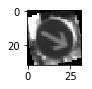

In [56]:
# Normalization
print("normalizing inputs")
X_train = np.asarray([(x - 128.) / 128. for x in X_train])
print("normalizing validation")
X_valid = np.asarray([(x - 128.) / 128. for x in X_valid])
print("normalizing test")
X_test = np.asarray([(x - 128.) / 128. for x in X_test])

#testing that after normalization the image is still the same
display_image(X_train[index], y_train[index])

### Model Architecture

In [57]:
### Define your architecture here.
### Feel free to use as many code cells as needed.


In [68]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 15
BATCH_SIZE = 256
IM_SHAPE = X_train[0].shape
mu = 0
sigma = 0.05

conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, IM_SHAPE[2], 32), mean=mu, stddev=sigma))
conv1_b = tf.Variable(tf.zeros(32))
conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 16), mean=mu, stddev=sigma))
conv2_b = tf.Variable(tf.zeros(16))
fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 300), mean=mu, stddev=sigma))
fc1_b = tf.Variable(tf.zeros(300))
fc2_W = tf.Variable(tf.truncated_normal(shape=(300, 200), mean=mu, stddev=sigma))
fc2_b = tf.Variable(tf.zeros(200))
fc4_W = tf.Variable(tf.truncated_normal(shape=(200, n_classes), mean=mu, stddev=sigma))
fc4_b = tf.Variable(tf.zeros(n_classes))

def nn(x, keep_prob):
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x32.
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    # Activation.
    conv1 = tf.nn.relu(conv1)
    # Pooling. Input = 28x28x32. Output = 14x14x32.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Input = 14x14x32, Output = 10x10x16.
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    # Activation.
    conv2 = tf.nn.relu(conv2)
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)

    # Layer 3: Fully Connected. Input = 400. Output = 300.
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    # Activation
    fc1 = tf.nn.relu(fc1)
    #fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 300. Output = 200.
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    # Activation.
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # Layer 5: Fully Connected. Input = 200. Output = 43.
    signs = tf.matmul(fc2, fc4_W) + fc4_b

    return (signs, conv1)


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [69]:
x = tf.placeholder(tf.float32, (None, IM_SHAPE[0], IM_SHAPE[1], IM_SHAPE[2]))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

# placeholders to display the feature maps later
conv1 = tf.placeholder(tf.float32, (None, 14, 14, 32))
conv2 = tf.placeholder(tf.float32, (None, 5, 5, 16))

# ## Training Pipeline
rate = 0.001
keep_prob = tf.placeholder(tf.float32)
signs, conv1 = nn(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=signs, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=rate)
training_operation = optimizer.minimize(loss_operation)

# ## Model Evaluation
correct_prediction = tf.equal(tf.argmax(signs, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
images = tf.placeholder(tf.float32, (None, 32, 32, 1))
prediction = tf.argmax(nn(images,1)[0], 1)
smax = tf.nn.softmax(nn(images,1)[0])

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    n = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, n, BATCH_SIZE):
        if offset + BATCH_SIZE > len(X_data):
            batch_x, batch_y = X_data[offset:], y_data[offset:]
        else:
            batch_x, batch_y = X_data[offset:offset + BATCH_SIZE], y_data[offset:offset + BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / n


In [70]:
# ## Train the Model
# first time, set train=True. Then set train=False to use stored results
train = True

if train:
    # ## Train the Model
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)

        print("Training...")
        print()
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                if end > n_train:
                    batch_x, batch_y = X_train[offset:], y_train[offset:]
                else:
                    batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.4})
            
            training_accuracy = evaluate(X_train, y_train)
            validation_accuracy = evaluate(X_valid, y_valid)
            print("EPOCH {} ...".format(i + 1))
            print("Training Accuracy = {:.3f}".format(training_accuracy))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))

        saver.save(sess, './traffic')
        print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.906
Validation Accuracy = 0.873
EPOCH 2 ...
Training Accuracy = 0.962
Validation Accuracy = 0.912
EPOCH 3 ...
Training Accuracy = 0.980
Validation Accuracy = 0.922
EPOCH 4 ...
Training Accuracy = 0.989
Validation Accuracy = 0.944
EPOCH 5 ...
Training Accuracy = 0.993
Validation Accuracy = 0.942
EPOCH 6 ...
Training Accuracy = 0.991
Validation Accuracy = 0.941
EPOCH 7 ...
Training Accuracy = 0.996
Validation Accuracy = 0.951
EPOCH 8 ...
Training Accuracy = 0.995
Validation Accuracy = 0.956
EPOCH 9 ...
Training Accuracy = 0.997
Validation Accuracy = 0.958
EPOCH 10 ...
Training Accuracy = 0.998
Validation Accuracy = 0.955
EPOCH 11 ...
Training Accuracy = 0.999
Validation Accuracy = 0.955
EPOCH 12 ...
Training Accuracy = 0.998
Validation Accuracy = 0.956
EPOCH 13 ...
Training Accuracy = 0.999
Validation Accuracy = 0.963
EPOCH 14 ...
Training Accuracy = 0.999
Validation Accuracy = 0.956
EPOCH 15 ...
Training Accuracy = 0.998
Validation Accuracy

In [61]:
# testing the model
with tf.Session() as sess:
    print("Testing...")
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))


Testing...
Test Accuracy = 0.940


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

28 Children crossing
3 Speed limit (60km/h)
17 No entry
10 No passing for vehicles over 3.5 metric tons
27 Pedestrians


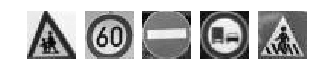

In [62]:
files = ['children_crossing.jpg', 'max60.jpg', 'no_entry.jpg', 'No_passing_over_tons.jpg', 'Pedestrians_with_back.jpg'] #, 'roundabout_mandatory.jpg', 'stop.jpg']
new_imgs = np.asarray([(x - 128.) / 128. for x in [np.asarray(Image.open('./examples/' + f).convert('L')).reshape(32, 32, 1) for f in files]])
new_labels = [28, 3, 17, 10, 27] #, 40, 14]
new_labels_verbose = ["%d %s" %(c,labels[c]) for c in new_labels]
display_image_vector(new_imgs, '\n'.join(map(str, new_labels_verbose)))


### Predict the Sign Type for Each Image

In [63]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    prediction_codes = sess.run(prediction, feed_dict={images: new_imgs})

for code in prediction_codes:
    print(code, labels[code])

11 Right-of-way at the next intersection
38 Keep right
17 No entry
10 No passing for vehicles over 3.5 metric tons
11 Right-of-way at the next intersection


### Analyze Performance

In [64]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    newtest_accuracy = evaluate(new_imgs, new_labels)
    print("New images Accuracy = {:.3f}".format(newtest_accuracy))

New images Accuracy = 0.400


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 


In [65]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax = sess.run(smax, feed_dict={images: new_imgs})
    #print(softmax)
    print(sess.run(tf.nn.top_k(softmax, k=5)))

TopKV2(values=array([[  9.99971032e-01,   1.47072369e-05,   1.31473962e-05,
          1.20935454e-06,   4.66812473e-08],
       [  6.78861737e-01,   2.74346411e-01,   4.66418825e-02,
          1.49755826e-04,   8.04072329e-08],
       [  1.00000000e+00,   7.31278815e-10,   2.43444237e-10,
          6.29186980e-11,   1.65997043e-11],
       [  1.00000000e+00,   2.98403435e-09,   1.38519364e-15,
          1.11415948e-16,   7.13879616e-18],
       [  9.99821365e-01,   1.77855196e-04,   8.46645776e-07,
          2.87282624e-08,   2.21016307e-08]], dtype=float32), indices=array([[11, 40, 28, 30, 18],
       [38,  3,  2,  1, 25],
       [17, 38, 13,  9, 12],
       [10, 42,  5, 20, 25],
       [11, 30, 23, 21, 20]]))


---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [66]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = sess.run(tf_activation, feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

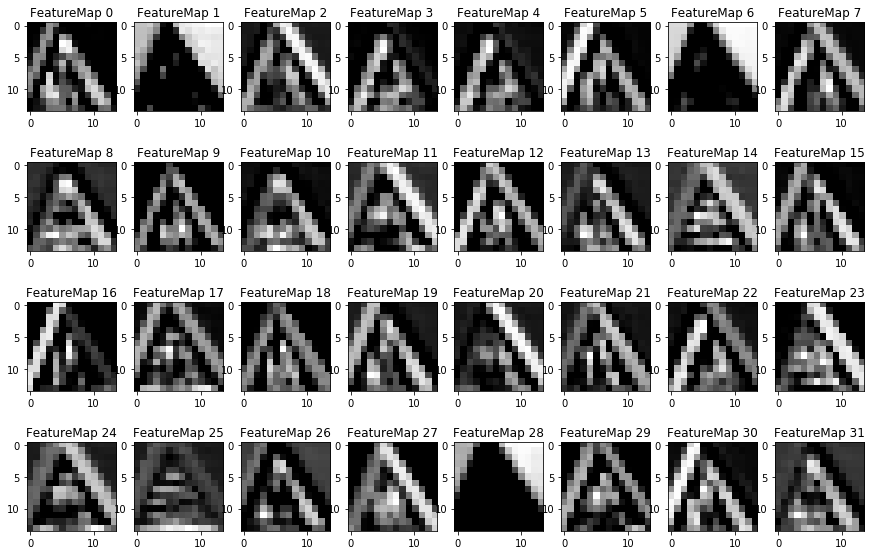

In [67]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    outputFeatureMap(np.asarray([new_imgs[0]]), conv1)


### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


We see in the feature maps that the first convolution layer learns the basic shapes of the signs. With figure 3 for example, we can easily see the circular shape of the sign and even the shape of the two vehicles. In figure 0, we can see the triangle shape and some details of the interior.
I don't see much help on the second layer though. It is too small to show much detail, but I think the first layer by itself is enough for these simple shapes.
Tried the same network without the second convolutional layer and with broader fully connected layers at the end: the accuracy was lower than the two conv layers network. Went back to two conv layers.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 